# EDA for Walmart Store Sales

In [1]:
# Import Pandas library for data and analytic operations.
import pandas as pd

In [2]:
# Load CSV file as dataframe.
df = pd.read_csv('./data/Walmart_Store_sales.csv')

In [3]:
# Display header of the dataframe.
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Display information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Change the Date column to the correct datatime type.
df['Date'] = df['Date'].astype('datetime64[ns]')

In [6]:
# Display header of the dataframe.
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
# Display information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
# Check any null in the entire dataframe.
df.isnull().values.any()

False

In [9]:
# Check if any column contains a null value.
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
# Display the descriptive statistic of the dataframe.
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000


In [11]:
# Display top Stores of Total Sales.
total_sales = df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
total_sales.head(10)

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Sum of Weekly Sales')

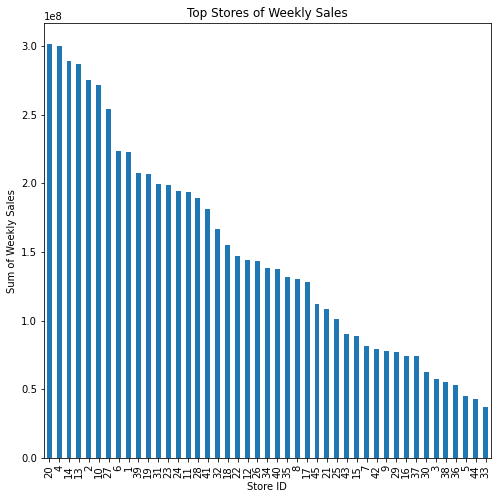

In [12]:
# Plot top 10 Stores of Total Sales as a bar chart.
pandaplot = total_sales.plot.bar(figsize=(8,8))
pandaplot.set_title('Top Stores of Weekly Sales')
pandaplot.set_xlabel('Store ID')
pandaplot.set_ylabel('Sum of Weekly Sales')

In [13]:
# Display top 10 Stores of Weekly Sales performance deviation.
df_std = df.groupby('Store')['Weekly_Sales'].std().round(2).sort_values(ascending=False)
df_std.head(10)

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
23    249788.04
27    239930.14
2     237683.69
39    217466.45
6     212525.86
Name: Weekly_Sales, dtype: float64

In [14]:
# Filter datafame to show total Sales of 2012 Q2 & 2012 Q3 and group by Store.
y2012_q2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()
y2012_q3_sales = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [15]:
# Create a new dataframe to display Sales of 2012 Q2 & 2012 Q3, and calculate the Difference and Growth Rate.
pd.DataFrame({'2012 Q2 Sales':y2012_q2_sales,
              '2012 Q3 Sales':y2012_q3_sales,
              'Difference':(y2012_q3_sales-y2012_q2_sales),
              'Growth Rate':(y2012_q3_sales-y2012_q2_sales)/y2012_q3_sales*100}).sort_values(by=['Growth Rate'],
              ascending=False).head()

,2012 Q2 Sales,2012 Q3 Sales,Difference,Growth Rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.869323
7,7613594.0,7322394.0,-291200.0,-3.976841
35,10753571.0,10252123.0,-501448.0,-4.891163
26,13218290.0,12417575.0,-800715.0,-6.448240
39,20191586.0,18899955.0,-1291631.0,-6.834043


In [16]:
# Define the dates of the Public Holiday.
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [17]:
# Filter dataframe to calculate the average Sales in Public Holiday.
Super_Bowl_sales = round(df.loc[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_sales = round(df.loc[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_sales = round(df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_sales = round(df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [18]:
# Display the average Sales in Public Holiday.
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [19]:
# Filter dataframe to calculate the average Sales in Non-Holiday.
non_holiday_sales = round(df[(df['Holiday_Flag'] == 0)]['Weekly_Sales'].mean(),2)

In [20]:
# Display the average Sales in Non-Holiday.
non_holiday_sales

1041256.38

In [21]:
# Create a new dataframe to display average Sales on Public Holiday & Non-Holiday.
pd.DataFrame([{'Super Bowl Sales':Super_Bowl_sales,
              'Labour Day Sales':Labour_Day_sales,
              'Thanksgiving Sales':Thanksgiving_sales,
              'Christmas Sales':Christmas_sales,
              'Non Holiday Sales':non_holiday_sales}]).T

,0
Super Bowl Sales,1079127.99
Labour Day Sales,1042427.29
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
Non Holiday Sales,1041256.38


In [22]:
# Create Day, Month, and Year columns in the dataframe based on the Date column.
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [23]:
# Display header of the dataframe.
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [24]:
# Import Matplotlib library for chart visualization.
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

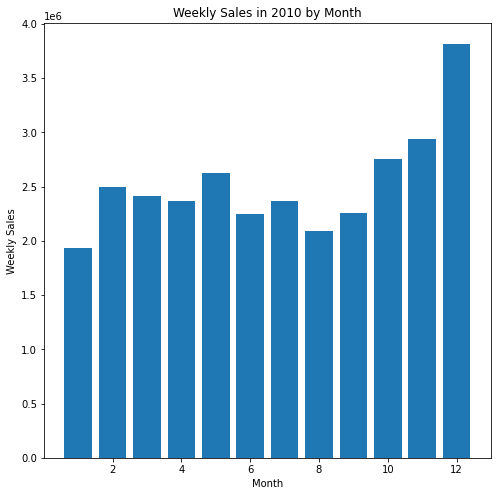

In [25]:
# Display Sales in 2010 by Month.
df_2010 = df[df.Year==2010]
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales in 2010 by Month')
plt.bar(df_2010['Month'],df_2010['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

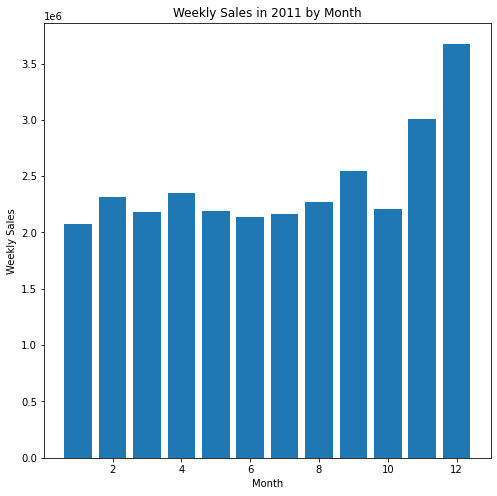

In [26]:
# Display Sales in 2011 by Month.
df_2011 = df[df.Year==2011]
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales in 2011 by Month')
plt.bar(df_2011['Month'],df_2011['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

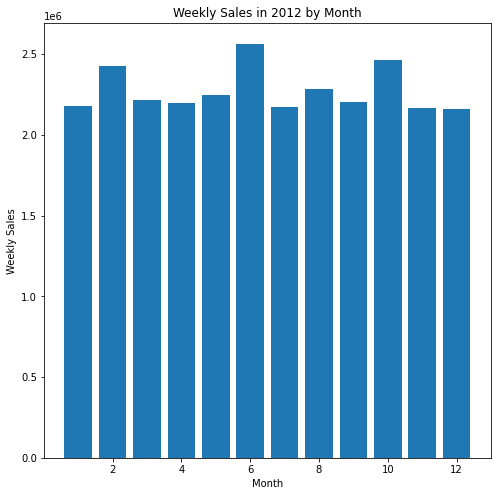

In [27]:
# Display Sales in 2012 by Month.
df_2012 = df[df.Year==2012]
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales in 2012 by Month')
plt.bar(df_2012['Month'],df_2012['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

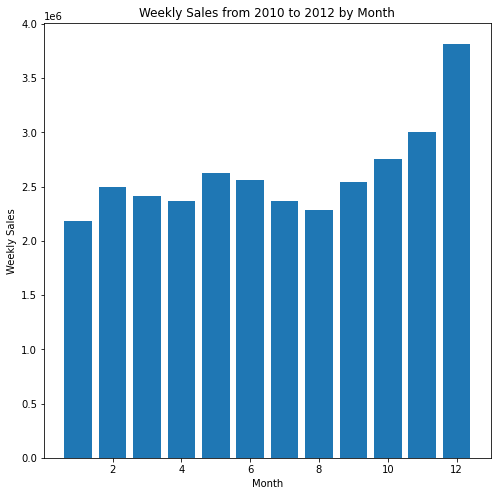

In [28]:
# Display Sales from 2010 to 2012 by Month.
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales from 2010 to 2012 by Month')
plt.bar(df['Month'],df['Weekly_Sales'])
plt.show

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>

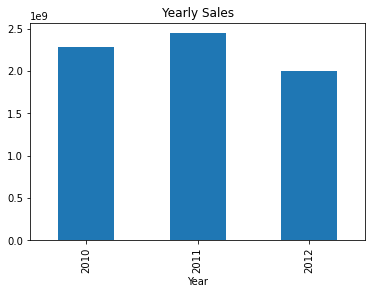

In [29]:
# Display Sales from 2010 to 2012 by Year.
plt.figure(figsize=(10,7), dpi=80)
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

In [30]:
# Import Seaborn library for statistical data visualization.
import seaborn as sns

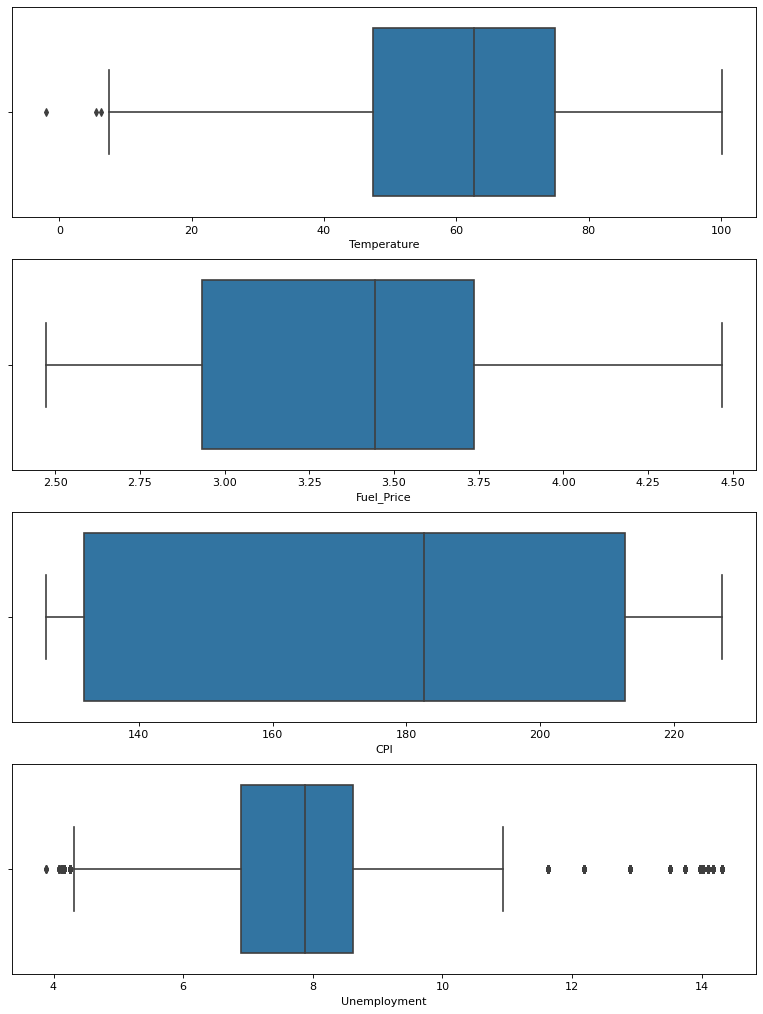

In [31]:
# Display data distribution of Temperature, Fuel Price, CPI, and Unemployment columns.
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Filter dataframe for a variant of data in Temperature and Unemployment.
df = df[df['Temperature'] >= 8]
df = df[df['Unemployment'] <= 10.5]
df = df[df['Unemployment'] >= 4.7]

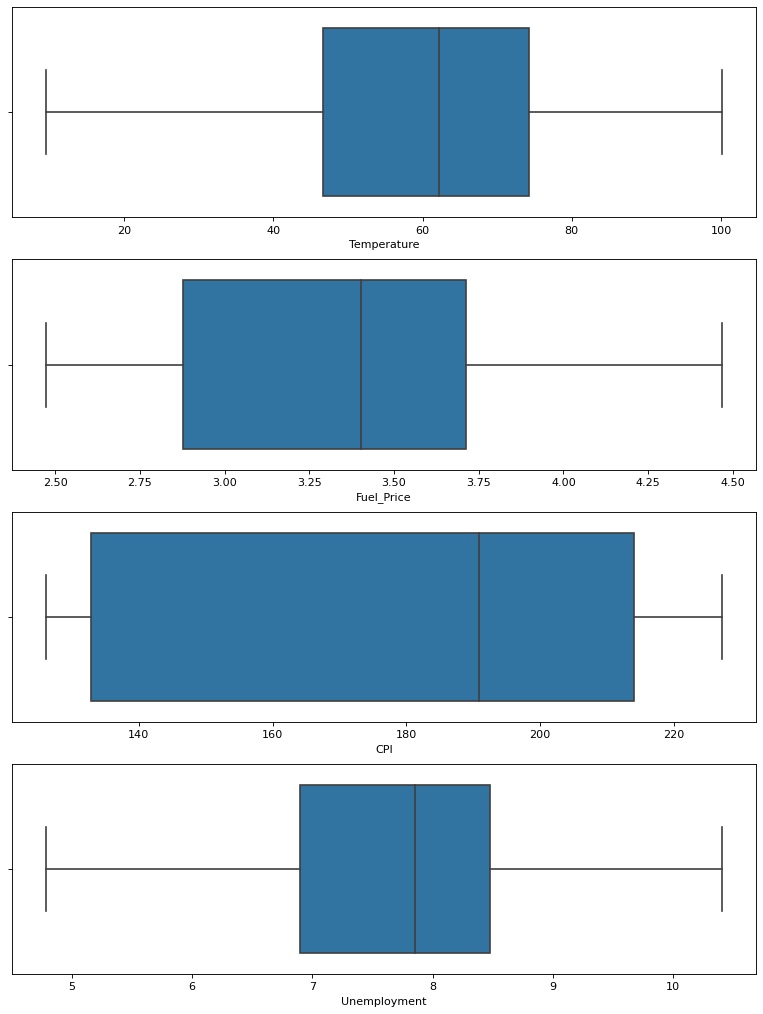

In [33]:
# Display data distribution of Temperature, Fuel Price, CPI, and Unemployment columns.
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Prepare the training data and corresponding label from the dataframe.
x = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y = df['Weekly_Sales']

In [35]:
# Import train_test_split function from Scikit-Learn for automatic Train & Test data split.
from sklearn.model_selection import train_test_split

In [36]:
# Perform Train & Test data split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
# Import StandardScaler function from Scikit-Learn for standardize features 
# by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [38]:
# Perform features standardization.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [39]:
# Import Scikit-Learn and related libraries for Linear Regression modeling.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

* Linear Regression *

Train Accuracy Score: 12.934999999999999 %
Test Accuracy Score: 11.89 %


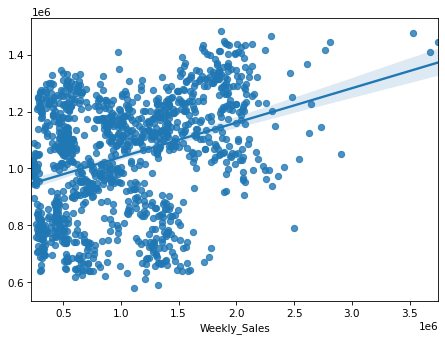

In [40]:
# Perform Linear Regression model training and print out Train & Test Accuracy.
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

print('* Linear Regression *\n')
print('Train Accuracy Score:', lr.score(x_train, y_train).round(5)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(5)*100, '%')

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, lr_y_pred)

In [41]:
# Import Scikit-Learn and related libraries for Random Forest modeling.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

* Random Forest Regressor *

Train Accuracy Score: 99.21 %
Test Accuracy Score: 92.02 %


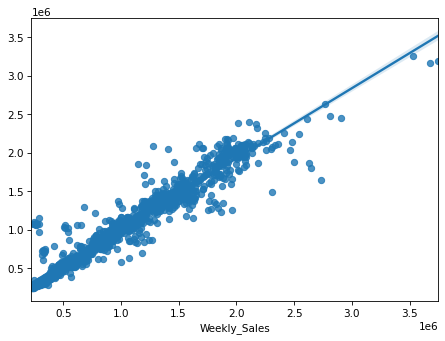

In [42]:
# Perform Random Forest model training and print out Train & Test Accuracy.
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_y_pred = rfr.predict(x_test)

print('* Random Forest Regressor *\n')
print('Train Accuracy Score: {0:.2f} %'.format(rfr.score(x_train, y_train)*100))
print('Test Accuracy Score: {0:.2f} %'.format(r2_score(y_test, rfr_y_pred)*100))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, rfr_y_pred)